# Intro

> Bellabeat is a successful small company, but they have the potential to become a larger player in the
> global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
> device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of
> Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices.

# Business task:

* Analyze smart device usage data in order to gain insight into *how consumers use* **non-Bellabeat** *smart devices.* 
* Select one Bellabeat product to apply these insights to in your presentation. 

Guide for analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# Environment setup

In [1]:
#knitr::opts_chunk$set(warning = FALSE, message = FALSE)

In [2]:
# install required packages
install.packages("janitor")
install.packages("tidyverse")
install.packages("sqldf")
install.packages("ggpubr")
#install.packages("skimr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘vctrs’, ‘ggplot2’, ‘rstatix’


Warning message in install.packages("ggpubr"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘ggplot2’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘ggpubr’ had non-zero exit status”


In [3]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load


library(tidyverse) # metapackage of all tidyverse packages
library(dplyr)
library(janitor)
library(ggplot2)
library(sqldf)
library(ggpubr)
#library(skimr)
library(lubridate)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Data

#### SOURCES
https://zenodo.org/record/53894#.X9oeh3Uzaao

#### License
CC0: Public Domain

-------------------------------------------------------------------------------------------------------------------------------
##### The data comes from may-juni 2016 and there are very few different observation sources, so it can be very biased.
##### We don't know anything about the measurement conditions, the population or the type of equipment used. 

In [4]:
steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv",show_col_types = FALSE)
calories <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv", show_col_types = FALSE)
sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv",show_col_types = FALSE)
intensities <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv",show_col_types = FALSE)
activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv",show_col_types = FALSE)
heart <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv",show_col_types = FALSE)
weight <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv",show_col_types = FALSE)

In [5]:
list.files(path = "/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/")

[1] "dailyActivity_merged.csv"           "dailyCalories_merged.csv"          
 [3] "dailyIntensities_merged.csv"        "dailySteps_merged.csv"             
 [5] "heartrate_seconds_merged.csv"       "hourlyCalories_merged.csv"         
 [7] "hourlyIntensities_merged.csv"       "hourlySteps_merged.csv"            
 [9] "minuteCaloriesNarrow_merged.csv"    "minuteCaloriesWide_merged.csv"     
[11] "minuteIntensitiesNarrow_merged.csv" "minuteIntensitiesWide_merged.csv"  
[13] "minuteMETsNarrow_merged.csv"        "minuteSleep_merged.csv"            
[15] "minuteStepsNarrow_merged.csv"       "minuteStepsWide_merged.csv"        
[17] "sleepDay_merged.csv"                "weightLogInfo_merged.csv"

# Review  and adjust the data.
View data to get known the structure, look for duplicates, NAs, empty spaces, errors.

In [6]:
datas <- c(steps,calories,sleep,intensities,activity,heart,weight) 
glimpse(datas)
#skim_without_charts(weight)

List of 47
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ StepTotal               : num [1:940] 13162 10735 10460 9762 12669 ...
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories                : num [1:940] 1985 1797 1776 1745 1863 ...
 $ Id                      : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay                : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords       : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep      : num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed          : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 $ Id                      :

##### As I see it is worthwhile to aggregate the data sets into one, by id. I will change column name ActivityDay (all data sets except to heart) to ActivityDate as in activity data set because such a name is more meaningful, as well as the data type of the columns from chr into Date. Columns SleepDay in sleep data set , and Time in heart data set types will be changed from chr into POSIXct because they are of datetime format.

In [7]:
steps <- steps %>% 
    rename(ActivityDate = ActivityDay) %>% 
    mutate(ActivityDate = as.Date(ActivityDate,"%m/%d/%Y"))

calories <- calories %>% 
    rename(ActivityDate= ActivityDay) %>% 
    mutate(ActivityDate = as.Date(ActivityDate,"%m/%d/%Y"))
  
intensities <- intensities %>% 
    rename(ActivityDate = ActivityDay) %>% 
    mutate(ActivityDate = as.Date(ActivityDate,"%m/%d/%Y"))

sleep <- sleep %>% mutate(SleepDay = as.POSIXct(SleepDay,format="%m/%d/%Y %H:%M:%OS"))
weight.manual <- weight %>% 
  mutate(Date = as.POSIXct(Date,format="%m/%d/%Y %H:%M:%OS")) %>% 
  select(-WeightPounds,-Fat,-LogId) %>% 
  filter(IsManualReport == TRUE)
weight.auto <- weight %>% 
  mutate(Date = as.POSIXct(Date,format="%m/%d/%Y %H:%M:%OS")) %>% 
  select(-WeightPounds,-Fat,-LogId) %>% 
  filter(IsManualReport == FALSE)

heart <- heart %>% mutate(Time = as.POSIXct(Time,format="%m/%d/%Y %H:%M:%OS"))
activity <- activity %>% 
  mutate(ActivityDate = as.POSIXct(ActivityDate,"%m/%d/%Y",tz="UTC"))

# Data clean and merge

In [8]:
sum(is.na(steps))
steps <- steps[complete.cases(steps), ]# or:
#steps <- steps %>% drop_na()
steps <- steps[which(steps$StepTotal !=0 ), ] # Remove zero-rows
sum(duplicated(steps))
steps <- steps[!duplicated(steps),]
sum(is.na(steps))
sum(duplicated(steps))
dim(steps)
#--------------------loops in R are devil ;)
sum(is.na(calories))
calories <- calories[complete.cases(calories), ]# or:
calories <- calories[which(calories$Calories !=0 ), ] # Remove zero-rows
sum(duplicated(calories))
calories <- calories[!duplicated(calories),]
sum(is.na(calories))
sum(duplicated(calories))
dim(calories)
#--------------------loops in R are devil ;)
sum(is.na(sleep))
sleep <- sleep[complete.cases(sleep), ]# or:
# Remove zero-rows - not here - zeros allowed
sum(duplicated(sleep))
sleep <- sleep[!duplicated(sleep),]
sum(is.na(sleep))
sum(duplicated(sleep))
dim(sleep)
#--------------------loops in R are devil ;)
sum(is.na(heart))
heart <- heart[complete.cases(heart), ]# or:
heart <- heart[which(heart$Value !=0 ), ] # Remove zero-rows - we don't like zombies
sum(duplicated(heart))
heart <- heart[!duplicated(heart),]
sum(is.na(heart))
sum(duplicated(heart))
dim(heart)
weight.auto <- weight.auto[!duplicated(weight.auto),]
weight.manual <- weight.manual[!duplicated(weight.manual),]

[1] 0

[1] 0

[1] 0

[1] 0

[1] 863   3

[1] 0

[1] 0

[1] 0

[1] 0

[1] 936   3

[1] 0

[1] 3

[1] 0

[1] 0

[1] 410   5

[1] 0

[1] 9334

[1] 0

[1] 0

[1] 2474324       3

#### Here is my all_activities data set.

In [9]:
list_df<-list(steps,calories,intensities,activity)
sfx <- c(".steps",".calories",".intensities",".activity")
all_activities <-list_df[[1]]
for(i in head(seq_along(list_df),-1)){
    all_activities <- merge(all_activities, list_df[[i+1]], all = TRUE,
                 suffixes = sfx[i:(i+1)], by = c("Id","ActivityDate"))
}

head(all_activities) 

,Id,ActivityDate,StepTotal,Calories.intensities,SedentaryMinutes.intensities,LightlyActiveMinutes.intensities,FairlyActiveMinutes.intensities,VeryActiveMinutes.intensities,SedentaryActiveDistance.intensities,LightActiveDistance.intensities,⋯,LoggedActivitiesDistance,VeryActiveDistance.activity,ModeratelyActiveDistance.activity,LightActiveDistance.activity,SedentaryActiveDistance.activity,VeryActiveMinutes.activity,FairlyActiveMinutes.activity,LightlyActiveMinutes.activity,SedentaryMinutes.activity,Calories.activity
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,1985,728,328,13,25,0,6.06,⋯,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,1797,776,217,19,21,0,4.71,⋯,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,1776,1218,181,11,30,0,3.91,⋯,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,1745,726,209,34,29,0,2.83,⋯,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,1863,773,221,10,36,0,5.04,⋯,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,1728,539,164,20,38,0,2.51,⋯,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [10]:
all_activities %>% 
  group_by(Id) %>% 
  summarise(mean=mean(Calories.activity))# the same for Calories.intensity

Id,mean
<dbl>,<dbl>
1503960366,1816.419
1624580081,1483.355
1644430081,2811.300
1844505072,1573.484
1927972279,2172.806
2022484408,2509.968
2026352035,1540.645
2320127002,1724.161
2347167796,2043.444


In [11]:
sleep %>% 
  group_by(Id) %>% 
  summarise(mean=mean(TotalTimeInBed))

Id,mean
<dbl>,<dbl>
1503960366,383.2000
1644430081,346.0000
1844505072,961.0000
1927972279,437.8000
2026352035,537.6429
2320127002,69.0000
2347167796,491.3333
3977333714,461.1429
4020332650,379.7500


In [12]:
bit <-heart %>% 
  group_by(Id) %>% 
  summarise(mean=mean(Value))

# Looking for patterns

#### Assuming that very basic armband devices measure steps and heart rate let's join the two data sets by id.

In [13]:
armband <- steps %>% inner_join(heart) %>% group_by(Id)

Joining, by = "Id"


In [14]:
dim(armband)
arm_ids <- armband %>% summarise()
str(arm_ids)

[1] 65870731        5

tibble [14 × 1] (S3: tbl_df/tbl/data.frame)
 $ Id: num [1:14] 2.02e+09 2.03e+09 2.35e+09 4.02e+09 4.39e+09 ...


#### I think we have 14 armbands the data were collected from. As its Id is present in a wider set of all_activities (33 observations) where calories are measured, and that requires the knowledge both of distance as well as body mass, and the count of unique calories Id's is equal to the count of all_activities, I resume that this 14 armbands are some basic devices and the rest of 21 could be others, more advanced ie. smartwatches.

## What are Sedentary, Moderate & High Activity Exercise Levels? | [livestrong](https://www.livestrong.com/article/401892-what-are-sedentary-moderate-high-activity-exercise-levels/)

According to the[ 10,000 Steps Project](https://www.10000steps.org.au/articles/counting-steps/), people who take fewer than 5,000 steps a day have a sedentary lifestyle. The next level counts 5000-7499 steps is said as low activity level. Increasing your activity level to anywhere between 7,500 and 10,000 steps would place you into the moderate, or somewhat active, level. The active level is 10000 steps. Only those individuals who take more than 12,500 steps each day are considered highly active.

This data set takes into account such a breakdown:

In [15]:
distribution <- c(
sedentary_active <- length(which(all_activities$StepTotal <5000)),
low_avtive       <- length(which(all_activities$StepTotal >= 5000 & all_activities$StepTotal <= 7499)),
somewhat_active  <- length(which(all_activities$StepTotal >= 7500 & all_activities$StepTotal <= 9999)),
active           <- length(which(all_activities$StepTotal >= 10000 & all_activities$StepTotal < 12500)),
highly_active    <- length(which(all_activities$StepTotal >= 12500)))


In [16]:
percent <- round((distribution*100)/sum(distribution), digits = 1)

#create data frame
pie <- data.frame("category" = factor(c('sedentary','low','somewhat','active','highly'),levels=c('sedentary','low','somewhat','active','highly'),ordered=TRUE), "amount" = percent)

#create pie chart
plot1 <- ggplot(pie, aes(x="", y=amount, fill=category)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = paste0(amount, "%")),size=3, position = position_stack(vjust=0.5)) +
  labs(x = NULL, y = NULL, fill = NULL, title = "Users activity by breakdown",subtitle="according to 10000 Steps Project",tag="Overall") +
  theme_classic() +
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank()) +
  scale_fill_manual(values=c("#FF5733", "#BD33FF", "#33DBFF", "#75FF33", "#F0D090"))

ggsave("pics/overall_steps.png",plot=plot1,width=16,height=10,units="cm")

#### It is time to see if armband data set is a part of all_devices data set.

In [17]:
for(item in seq_along(as.vector(arm_ids[[1]]))){
    if((arm_ids[[1]][item] %in% arm_ids[[1]]) & (arm_ids[[1]][item] %in% all_activities[[1]]))
    {
      cat("Found item",item,"with id =",arm_ids[[1]][item],"\n",sep=" ")
      }
      else print("Not found")
    }

Found item 1 with id = 2022484408 
Found item 2 with id = 2026352035 
Found item 3 with id = 2347167796 
Found item 4 with id = 4020332650 
Found item 5 with id = 4388161847 
Found item 6 with id = 4558609924 
Found item 7 with id = 5553957443 
Found item 8 with id = 5577150313 
Found item 9 with id = 6117666160 
Found item 10 with id = 6775888955 
Found item 11 with id = 6962181067 
Found item 12 with id = 7007744171 
Found item 13 with id = 8792009665 
Found item 14 with id = 8877689391 


> The result of the above comparison indicates that the devices, considered by me as arm bands are included in the overall data set. Let's see if they differ from the total by checking the breakdown by number of steps for these devices only.

In [18]:
arm_steps <- sqldf("SELECT * FROM all_activities
             WHERE Id IN arm_ids")
arm_steps <- arm_steps[complete.cases(arm_steps),]# remove NA
mean_arm_steps <-
  arm_steps %>% group_by(Id) %>% summarise(mean=mean(StepTotal))

arm_distribution <-
  c(
    sedentary_active <- length(which(mean_arm_steps$mean < 5000)),
    low_avtive       <-length(which((mean_arm_steps$mean >= 5000) &
      (mean_arm_steps$mean <= 7499))),
    somewhat_active  <-length(which((mean_arm_steps$mean >= 7500) &
      (mean_arm_steps$mean <= 9999))),
    active           <-length(which((mean_arm_steps$mean >= 10000) &
      (mean_arm_steps$mean < 12500))),
    highly_active    <- length(which(mean_arm_steps$mean >= 12500))
  )
percent <- round((arm_distribution*100)/sum(arm_distribution), digits = 1)

#create data frame
pie <- data.frame("category" = factor(c('sedentary','low','somewhat','active','highly'),levels=c('sedentary','low','somewhat','active','highly'),ordered=TRUE), "amount" = percent)

#create pie chart
plot2<-ggplot(pie, aes(x="", y=amount, fill=category)) +
  geom_bar(stat="identity", width=1,show.legend=FALSE) +
  coord_polar("y", start=0) +
  geom_text(aes(label = paste0(amount, "%")),size=3, position = position_stack(vjust=0.5)) +
  labs(x = NULL, y = NULL, fill = NULL, title = "Users activity by breakdown ",subtitle="according to 10000 Steps Project",tag="Armband") +
  theme_classic() +
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank()) +
  scale_fill_manual(values=c("#FF5733", "#BD33FF", "#33DBFF", "#75FF33", "#F0D090"))

ggsave("pics/armband_users_steps.png",plot=plot2,width=16,height=10,units="cm")


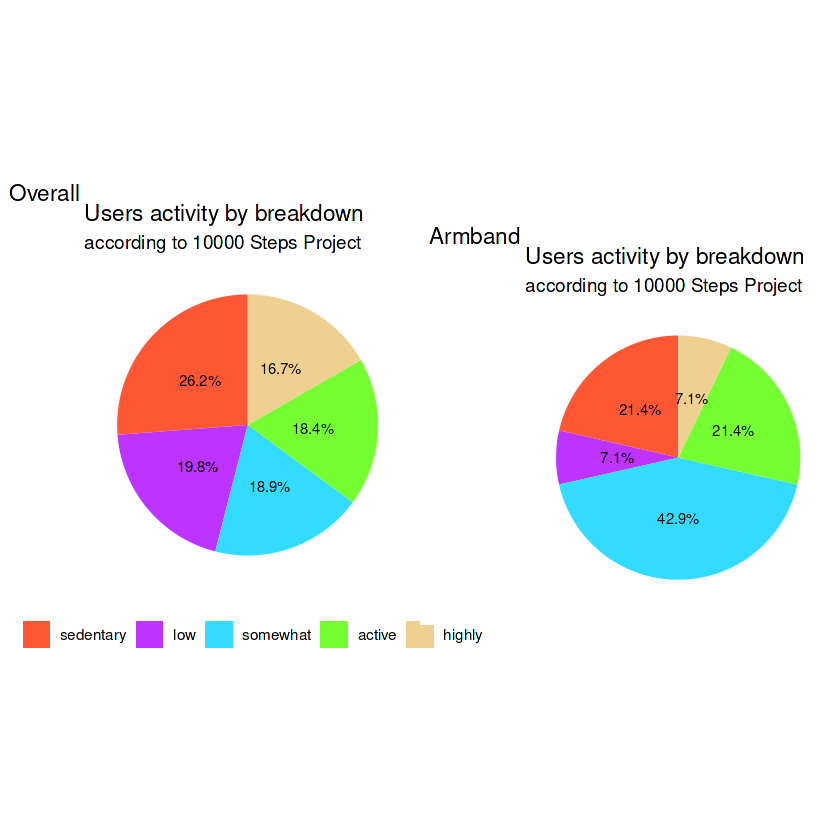

In [19]:
ggarrange(plot1,plot2,legend="bottom",nrow=1)

# The first insight

##### Here we can see, that users of sedentary and low activity are here more rare listed in comparison to all users(30%-50%), as well as the moderate activity is here much bigger (19%-43%). The high activity level is a bit smaller. My insights here is that most moderate active users use armbands and the more and very active use more advanced devices.


Warning message:
“Removed 77 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 77 rows containing missing values (geom_point).”
Warning message:
“Removed 77 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 77 rows containing missing values (geom_point).”
Warning message:
“Removed 77 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 77 rows containing missing values (geom_point).”


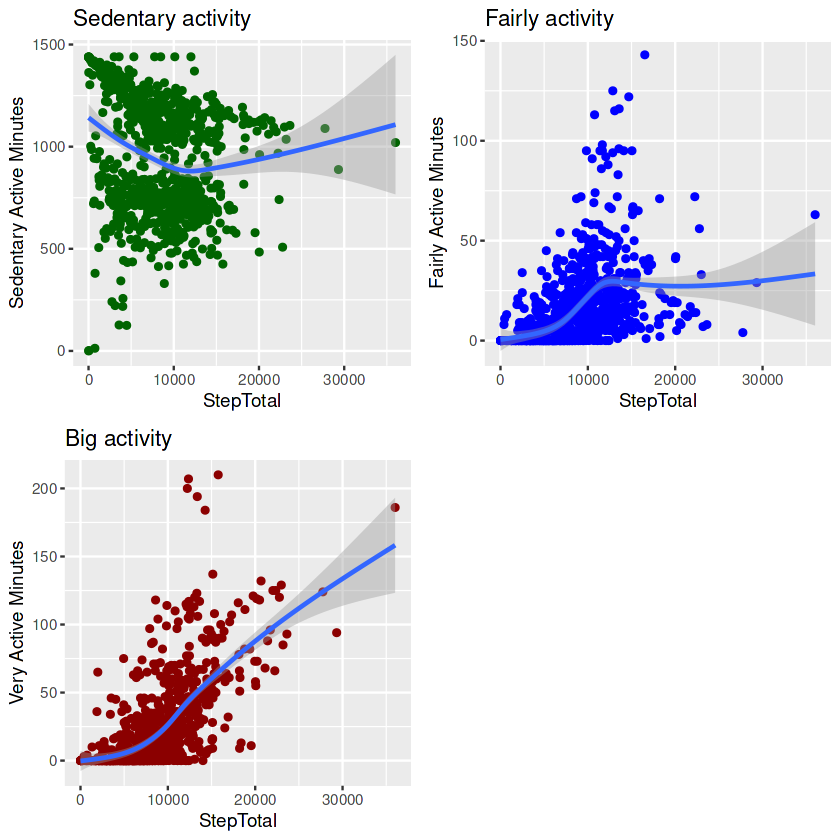

In [20]:
sed<-ggplot(data=all_activities, aes(x=StepTotal, y=SedentaryMinutes.intensities))+ geom_point(color='darkgreen')+
  geom_smooth(method = "gam", formula=y ~ s(x,bs="cs"))+
  labs(title="Sedentary activity",y = "Sedentary Active Minutes")

fair<-ggplot(data=all_activities, aes(x=StepTotal, y=FairlyActiveMinutes.intensities)) + 
geom_point(color='blue') +
  geom_smooth(method = "gam", formula=y ~ s(x,bs="cs"))+
  labs(title="Fairly activity",y = "Fairly Active Minutes")

very<-ggplot(data=all_activities, aes(x=StepTotal, y=VeryActiveMinutes.intensities)) + 
geom_point(color='darkred') +
  geom_smooth(method = "gam", formula=y ~ s(x,bs="cs"))+
  labs(title="Big activity",y = "Very Active Minutes")

plot3 <- ggarrange(sed,fair,very)
ggsave("pics/active_step_minutes.png",plot=plot3,width=16,height=10,units="cm")
plot3

#### The more active users are, the less minutes they train. It shows very poor condition of users with sedentary way of life.
------------------------------------------------------------------------------

#### Here we have positive relation between active minutes and number of steps. Past about 15K of steps the activity seems to be almost constant - fairly active users do not cover distances longer than 15 km and they cover it with lower peace.

------------------------------------------------------------------------------

#### And here the activity is almost linear, and the pace seems to be faster - the longer distances are covered the more active minutes are present.
--------------------------------------------------------------------------------------------------------------------------------





# And what about the weight?

In [21]:
minimax <-weight %>% 
  group_by(Id,IsManualReport) %>% 
  summarise(mean_bmi=mean(BMI), mean_weight=mean(WeightKg))
minimax

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Id,IsManualReport,mean_bmi,mean_weight
<dbl>,<lgl>,<dbl>,<dbl>
1503960366,TRUE,22.65000,52.60000
1927972279,FALSE,47.54000,133.50000
2873212765,TRUE,21.57000,57.00000
4319703577,TRUE,27.41500,72.35000
4558609924,TRUE,27.21400,69.64000
5577150313,FALSE,28.00000,90.70000
6962181067,TRUE,24.02800,61.55333
8877689391,FALSE,25.48708,85.14583


> We have eight measurements, three of which are not manual entries.

In [22]:
weekday_calories <- calories %>%
  mutate(weekday = weekdays(ActivityDate))


weekday_calories$weekday <-ordered(weekday_calories$weekday, 
                        levels=c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))  

 mean_calories <-weekday_calories%>%
  group_by(weekday) %>%
  summarise (daily_calories = mean(Calories))
 
head(mean_calories,n=7)

weekday,daily_calories
<ord>,<dbl>
Monday,2324.208
Tuesday,2371.616
Wednesday,2302.620
Thursday,2229.910
Friday,2331.786
Saturday,2374.114
Sunday,2263.000


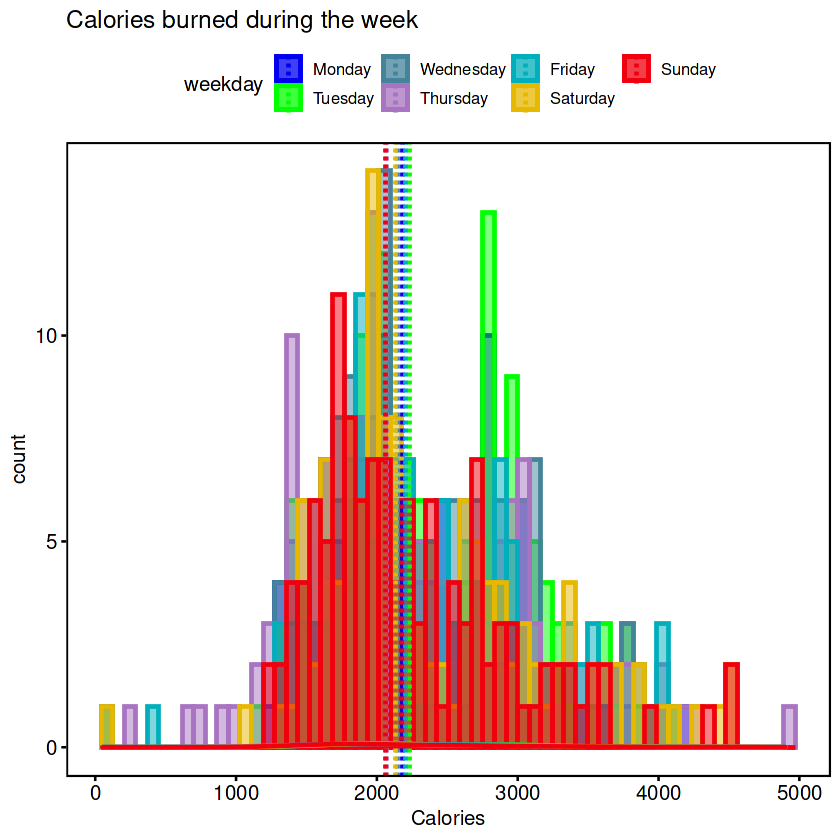

In [23]:

plot4 <- gghistogram(weekday_calories,
            title = "Calories burned during the week",
            x="Calories",
            #y="count",
            size = 1,
            add="median",
            bins=60, 
            combine=TRUE,
            add_density=TRUE,
            color="weekday",
            fill="weekday",palette = c("#0000F0","#00FF00","#458399","#A873C0","#00AFBB", "#E7B800","#F0000F"))
ggsave("pics/calories_histogram.png",plot=plot4,width=16,height=10,units="cm")
plot4



>The plot above shows that the most activities take place on Sundays, but the most active days are Tuesday and Friday.

# SUMMARY

We have not enough data to gain insights into how consumers use non-Bellabeat smart devices based upon Fitbase Data from Fitbit .

I strongly recommend to collect more data from different sources, maybe from smart fitness accessories producers.  But based on this slim data set I could point to some trends:

    * Probably about a half of users are using armband devices.

    * A very small percent of users has measurements from an intelligent scale.

       Automatic and hand-made input values differ a lot. Probably hand-made inputs are not fair.

    * Majority of users has poor condition.

    * Majority of users is active on a short distances.

    * Very active use more advanced devices.

    * The most popular activity day is Sunday, but the most activity is present on other days.

My proposal to a marketing strategy is, that Bellabeat should concentrate on invention of more advanced armbands, that could control a broader spectrum of activity.   I see also an opportunity to capture a new market for selling smart scales, which are not popular among users.  Bellabeat should go out to its users with an offer of free workout plans that would increase their activity, which would in effect encourage the use of more advanced devices.



Thank you.